In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


In [2]:
all_data = pd.read_csv("all_data.csv")

In [3]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
all_data[all_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data = all_data.dropna(how="all")

In [7]:
data["Order Date"].isna().value_counts()

False    186305
Name: Order Date, dtype: int64

In [8]:
data["Month"] = data["Order Date"].str[0:2]

C:\Users\sunny\AppData\Local\Temp/ipykernel_28084/2794067569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"] = data["Order Date"].str[0:2]


In [9]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [10]:
data["Month"].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: Month, dtype: int64

In [11]:
data = data[data["Month"] != "Or"]

In [12]:
data["Month"]= data["Month"].astype("int32")

C:\Users\sunny\AppData\Local\Temp/ipykernel_28084/3447153876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"]= data["Month"].astype("int32")


In [13]:
data["Order Date"] = pd.to_datetime(data["Order Date"])

C:\Users\sunny\AppData\Local\Temp/ipykernel_28084/189678970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Order Date"] = pd.to_datetime(data["Order Date"])


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 10.6+ MB


In [15]:
data["Month"] = data["Order Date"].dt.month_name()

C:\Users\sunny\AppData\Local\Temp/ipykernel_28084/11032284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"] = data["Order Date"].dt.month_name()


In [16]:
data["Quantity Ordered"] = pd.to_numeric(data["Quantity Ordered"])
data["Price Each"] = pd.to_numeric(data["Price Each"])

C:\Users\sunny\AppData\Local\Temp/ipykernel_28084/1126239079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Quantity Ordered"] = pd.to_numeric(data["Quantity Ordered"])
C:\Users\sunny\AppData\Local\Temp/ipykernel_28084/1126239079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Price Each"] = pd.to_numeric(data["Price Each"])


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 11.3+ MB


In [18]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


In [19]:
data["Sales"] = data["Quantity Ordered"]* data["Price Each"]

C:\Users\sunny\AppData\Local\Temp/ipykernel_28084/2085034645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sales"] = data["Quantity Ordered"]* data["Price Each"]


In [20]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99


## Best Selling Month

In [21]:
data.groupby("Month")["Sales"].sum().sort_values(ascending=False)

Month
December     4613443.34
October      3736726.88
April        3390670.24
November     3199603.20
May          3152606.75
March        2807100.38
July         2647775.76
June         2577802.26
August       2244467.88
February     2202022.42
September    2097560.13
January      1822256.73
Name: Sales, dtype: float64

In [22]:
sns.set(font_scale= 1)

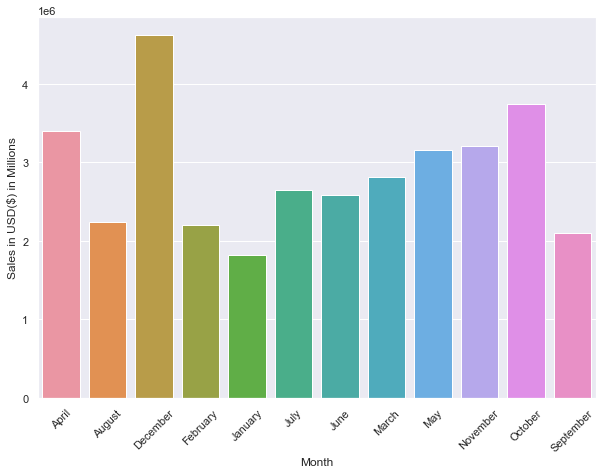

In [23]:
plt.figure(figsize=(10,7))

sns.barplot(x = data.groupby("Month")["Sales"].sum().index,
           y = data.groupby("Month")["Sales"].sum(),
           )
plt.xticks(rotation = 45)
plt.ylabel("Sales in USD($) in Millions")
plt.show()

### highest selling product

In [24]:
data["Product"].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [25]:
data["Month"].value_counts()

December     24984
October      20282
April        18279
November     17573
May          16566
March        15153
July         14293
June         13554
February     11975
August       11961
September    11621
January       9709
Name: Month, dtype: int64

## which city has the highest Sales

In [26]:
data["Purchase Address"].apply(lambda x: x.split()[3:-1])

0                 [Dallas,, TX]
2                 [Boston,, MA]
3           [Los, Angeles,, CA]
4           [Los, Angeles,, CA]
5           [Los, Angeles,, CA]
                  ...          
186845      [Los, Angeles,, CA]
186846    [San, Francisco,, CA]
186847    [San, Francisco,, CA]
186848    [San, Francisco,, CA]
186849    [San, Francisco,, CA]
Name: Purchase Address, Length: 185950, dtype: object

In [27]:
data["City"]=data["Purchase Address"].apply(lambda x: x.split(",")[1] + " " + x.split(",")[2].split(" ")[1])


C:\Users\sunny\AppData\Local\Temp/ipykernel_28084/3078961093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["City"]=data["Purchase Address"].apply(lambda x: x.split(",")[1] + " " + x.split(",")[2].split(" ")[1])


In [28]:
data.groupby("City")["Sales"].sum().sort_values(ascending= False)

City
 San Francisco CA    8262203.91
 Los Angeles CA      5452570.80
 New York City NY    4664317.43
 Boston MA           3661642.01
 Atlanta GA          2795498.58
 Dallas TX           2767975.40
 Seattle WA          2747755.48
 Portland OR         1870732.34
 Austin TX           1819581.75
 Portland ME          449758.27
Name: Sales, dtype: float64

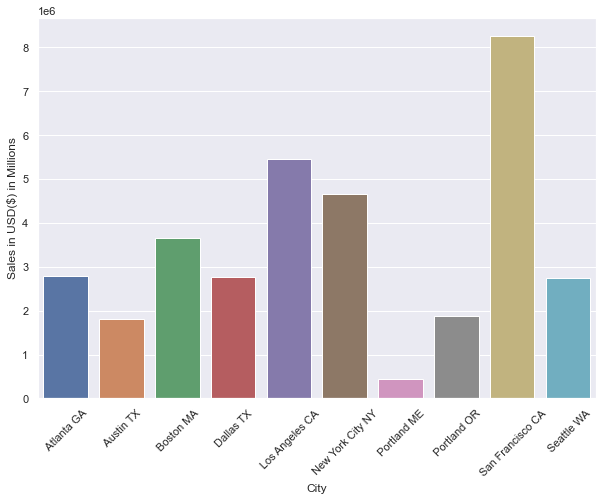

In [29]:
plt.figure(figsize=(10,7))

sns.barplot(x = data.groupby("City")["Sales"].sum().index,
           y = data.groupby("City")["Sales"].sum(),
           )
plt.xticks(rotation = 45)
plt.ylabel("Sales in USD($) in Millions")
plt.show()

## best time to put advertisement in the store  :

In [30]:
data["Hour"] = data["Order Date"].dt.hour
data.head()

C:\Users\sunny\AppData\Local\Temp/ipykernel_28084/53157534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hour"] = data["Order Date"].dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles CA,9


In [31]:
data["Minute"] = data["Order Date"].dt.minute


C:\Users\sunny\AppData\Local\Temp/ipykernel_28084/3363395461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Minute"] = data["Order Date"].dt.minute


In [32]:
data.groupby("Hour")["Order ID"].count()

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

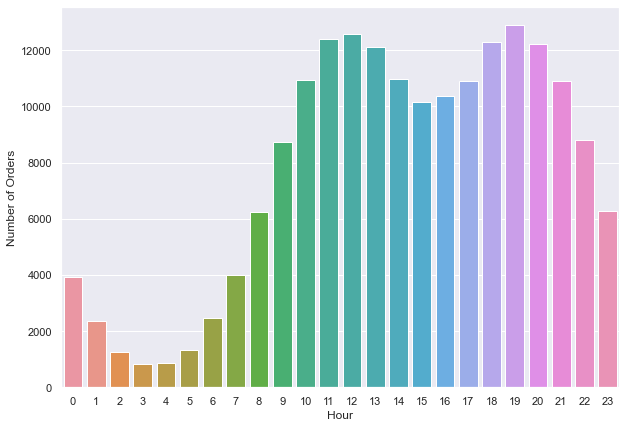

In [33]:
plt.figure(figsize=(10,7))
sns.color_palette("Blues")
sns.barplot(x = data.groupby("Hour")["Order ID"].count().index,
           y = data.groupby("Hour")["Order ID"].count(),
           )
plt.xticks(rotation = 0)
plt.ylabel("Number of Orders")
plt.show()

# products those are sold together

In [34]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles CA,9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,8.97,Los Angeles CA,20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,700.00,San Francisco CA,16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,700.00,San Francisco CA,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,379.99,San Francisco CA,17,30


In [35]:
df = data.loc[data["Order ID"].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles CA,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,Los Angeles CA,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,Los Angeles CA,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,Boston MA,11,31
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",September,3.84,Atlanta GA,20,18
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,11.99,Atlanta GA,0,25
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,5.98,Atlanta GA,0,25
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",September,600.00,San Francisco CA,13,49


In [36]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles CA,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,Los Angeles CA,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,Los Angeles CA,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,Boston MA,11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,Boston MA,11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,5.98,San Francisco CA,17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,600.00,San Francisco CA,17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",April,14.95,New York City NY,11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",April,11.95,New York City NY,11,7


In [37]:
df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

3                             Google Phone,Wired Headphones
4                             Google Phone,Wired Headphones
18                        Google Phone,USB-C Charging Cable
19                        Google Phone,USB-C Charging Cable
30        Bose SoundSport Headphones,Bose SoundSport Hea...
                                ...                        
186792         34in Ultrawide Monitor,AA Batteries (4-pack)
186803              Wired Headphones,AAA Batteries (4-pack)
186804              Wired Headphones,AAA Batteries (4-pack)
186841                    Google Phone,USB-C Charging Cable
186842                    Google Phone,USB-C Charging Cable
Name: Product, Length: 14649, dtype: object

In [38]:
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

C:\Users\sunny\AppData\Local\Temp/ipykernel_28084/725891025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


In [39]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",September,3.84,Atlanta GA,20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,11.99,Atlanta GA,0,25,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,5.98,Atlanta GA,0,25,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",September,600.00,San Francisco CA,13,49,"Google Phone,USB-C Charging Cable"


In [40]:
df = df[["Order ID","Grouped"]].drop_duplicates()

In [41]:
df

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [42]:
df.value_counts().sort_values(ascending=False)

Order ID  Grouped                                        
141275    USB-C Charging Cable,Wired Headphones              1
141795    iPhone,Wired Headphones                            1
141384    Google Phone,USB-C Charging Cable                  1
141450    Google Phone,Bose SoundSport Headphones            1
141457    iPhone,Apple Airpods Headphones                    1
                                                            ..
319556    Google Phone,Wired Headphones                      1
319584    iPhone,Wired Headphones                            1
319596    iPhone,Lightning Charging Cable                    1
319301    Vareebadd Phone,USB-C Charging Cable               1
319631    34in Ultrawide Monitor,Lightning Charging Cable    1
Length: 7136, dtype: int64

In [43]:
from itertools import combinations
from collections import Counter

In [44]:
count= Counter()

for row in df["Grouped"]:
#     print(row)
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
# print(count)

In [45]:
# count.most_common(10)

In [46]:
for k , v in count.most_common(10):
    print(k,v)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [47]:
count= Counter()

for row in df["Grouped"]:
#     print(row)
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,3)))
# print(count)
for k , v in count.most_common(10):
    print(k,v)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


# highest selling product

In [48]:
prod_data = data.groupby("Product").sum()[["Quantity Ordered","Sales"]]
prod_data

,Quantity Ordered,Sales
Product,,
20in Monitor,4129,454148.71
27in 4K Gaming Monitor,6244,2435097.56
27in FHD Monitor,7550,1132424.50
34in Ultrawide Monitor,6199,2355558.01
AA Batteries (4-pack),27635,106118.40
AAA Batteries (4-pack),31017,92740.83
Apple Airpods Headphones,15661,2349150.00
Bose SoundSport Headphones,13457,1345565.43
Flatscreen TV,4819,1445700.00


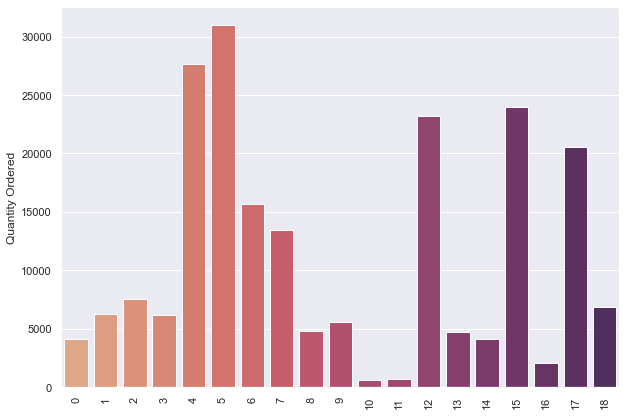

In [68]:
plt.figure(figsize=(10,7))
sns.color_palette("Blues")
sns.barplot(x = prod_data.index, 
           y = prod_data["Quantity Ordered"], palette="flare"
           )
plt.xticks(rotation = 90)

# plt.plot(prod_data.index,prod_data["Sales"])


plt.show()

# why the particular product is highest selling ! 

In [51]:
prod_data.reset_index(inplace=True)

In [52]:
products = pd.DataFrame(data.groupby(["Product","Price Each"])["Price Each"].nunique())

In [53]:
products = products.rename({"Price Each":"ss"},axis = 1)
products = products.drop("ss",axis = 1)

In [54]:
products.reset_index(inplace=True)

In [55]:
prod_data.columns,products.columns

(Index(['Product', 'Quantity Ordered', 'Sales'], dtype='object'),
 Index(['Product', 'Price Each'], dtype='object'))

In [56]:
prod_data = prod_data.merge(products,on="Product")

In [57]:
prod_data

,Product,Quantity Ordered,Sales,Price Each
0,20in Monitor,4129,454148.71,109.99
1,27in 4K Gaming Monitor,6244,2435097.56,389.99
2,27in FHD Monitor,7550,1132424.50,149.99
3,34in Ultrawide Monitor,6199,2355558.01,379.99
4,AA Batteries (4-pack),27635,106118.40,3.84
5,AAA Batteries (4-pack),31017,92740.83,2.99
6,Apple Airpods Headphones,15661,2349150.00,150.00
7,Bose SoundSport Headphones,13457,1345565.43,99.99
8,Flatscreen TV,4819,1445700.00,300.00
9,Google Phone,5532,3319200.00,600.00


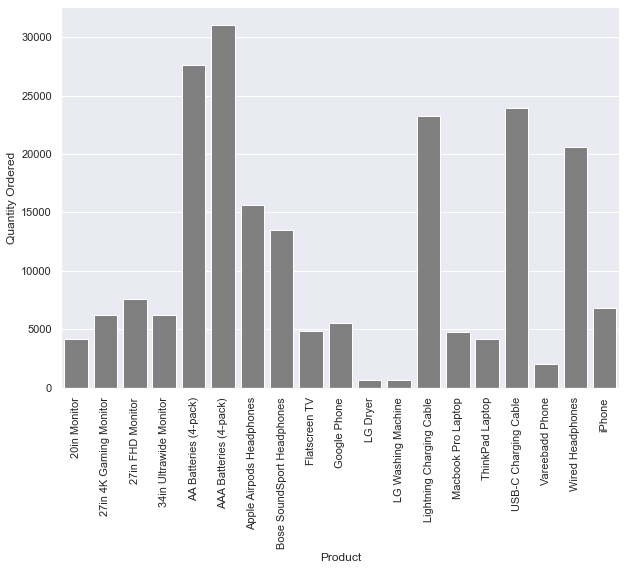

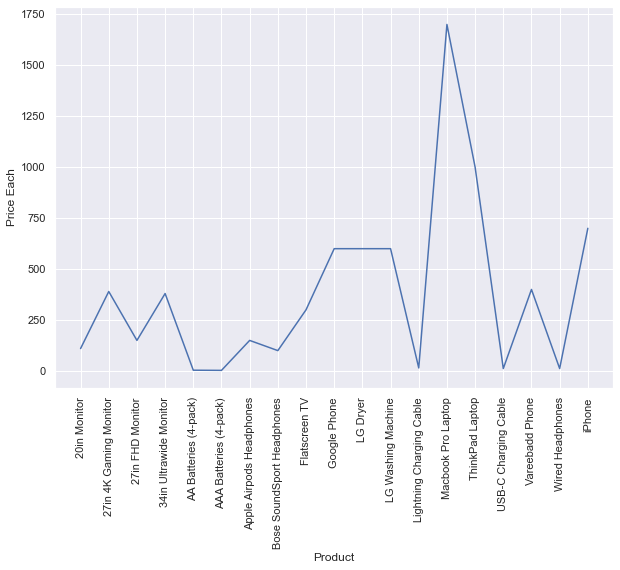

In [66]:
plt.figure(figsize=(10,7))

sns.barplot(x = prod_data["Product"], 
           y = prod_data["Quantity Ordered"], color='grey'
           )
# sns.lineplot(x = prod_data["Product"],
#             y = prod_data["Price Each"])
plt.xticks(rotation = 90)

# plt.plot(prod_data.index,prod_data["Sales"])


plt.show()
plt.figure(figsize=(10,7))

sns.lineplot(x = prod_data["Product"],
            y = prod_data["Price Each"])
plt.xticks(rotation = 90)
plt.show()

In [72]:
sns.color_palette()


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]